In [1]:
randn()


-0.27567008384527225

In [2]:
using LinearAlgebra, Statistics, Plots, LaTeXStrings

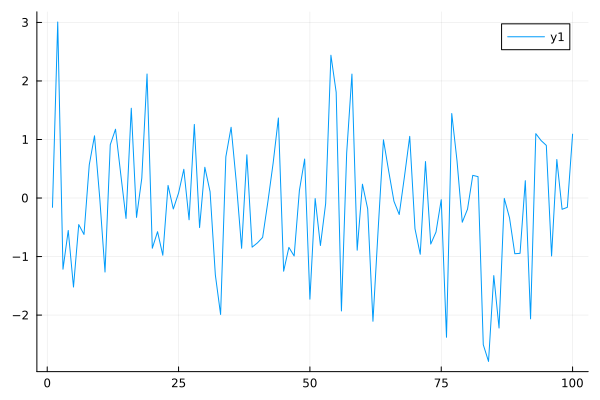

In [3]:
n = 100
ϵ = randn(n)
plot(1:n, ϵ)

In [4]:
typeof(ϵ)

Vector{Float64} (alias for Array{Float64, 1})

In [5]:
ϵ[1:5]

5-element Vector{Float64}:
 -0.15933480967337904
  3.007123421298861
 -1.21642092708116
 -0.5545440807868276
 -1.5213172758405762

In [6]:
# poor style
n = 100
ϵ = zeros(n)
for i in 1:n
    ϵ[i] = randn()
end

ϵ[1:5]

5-element Vector{Float64}:
  1.3727905205331121
 -0.4180896292166458
  0.09934428202292452
  0.17416017021289215
  1.279980276779058

In [7]:
# better style
n = 100
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i] = randn()
end

In [8]:
ϵ_sum = 0.0 # careful ro use 0.0 here, instead of 0
m = 5
for ϵ_val in ϵ[1:m]
    ϵ_sum = ϵ_sum + ϵ_val
end

ϵ_mean = ϵ_sum / m
ϵ[1:m]

5-element Vector{Float64}:
  2.100400808721844
 -1.431766791611256
  1.2758008983863636
 -1.4396386453447068
  0.5364897182457498

In [9]:
ϵ_mean ≈ mean(ϵ[1:m])
ϵ_mean ≈ sum(ϵ[1:m])/m

true

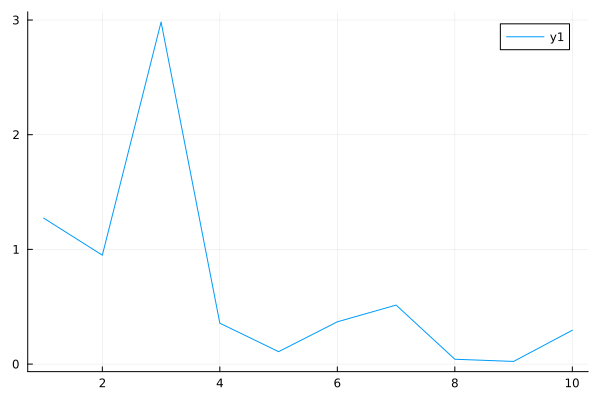

In [10]:
##  User defined functions
    ##
    function generatedata(n)
        ϵ= zeros(n)
        for i in eachindex(ϵ)
            ϵ[i] = (randn())^2 #    Squaring the result
        end
        return ϵ
    end
    data = generatedata(10)
    plot(data)

In [11]:
##   Still poor style
    ##
    function generatedata(n)
        ϵ = rand(n) # use built in function

        for i in eachindex(ϵ)
            ϵ[i] = ϵ[i]^2   #   Squaring the result
        end
        return ϵ
    end 
    data = generatedata(5)


5-element Vector{Float64}:
 0.02394669458535403
 0.016507684766066115
 0.41043860080649447
 0.09115414620476137
 0.1693081251844415

In [12]:
##  better style
    ##
    function genetadata(n)
        ϵ = randn(n)
        return ϵ.^2
    end
    data = generatedata(5)

5-element Vector{Float64}:
 0.45512820455896413
 0.603436648943094
 0.1613254241829229
 0.026367091098571493
 0.9580429830160161

In [13]:
##  Good style
    ##
    generatedata(n) = randn(n) .^2
    data = generatedata(5)

5-element Vector{Float64}:
 1.581964204442919
 0.8224655700776067
 0.547822868846814
 0.13510935794158227
 0.04785857655824009

In [14]:
##  Final abstract appraoch
    ##
    generatedata(n, gen) = gen.(randn(n)) # broadcasts on gen
    f(x) = x^2  #   Simple square function
    data = generatedata(5, f)

5-element Vector{Float64}:
 1.4277404376592207
 1.2583313931419762
 0.2972590384504356
 4.350281215231003
 0.7435027434013258

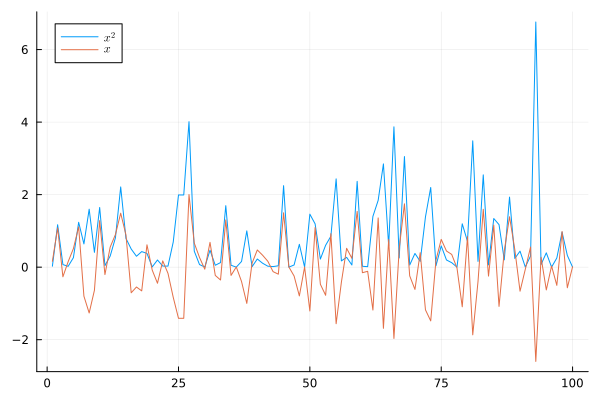

In [15]:
##  High degrees of abstraction and generality, e.g. passing in a function f in this case, can make code either clearer or more confusing, but Julia enables you to use these techniques with no performance overhead.
    ##
    ##  A direct solution with broadcasting, and small user-defined function
        ##
        n = 100
        f(x) = x^2

        x = randn(n)
        plot(f.(x), label = L"x^2")
        plot!(x, label = L"x")  #   layer on the same plot

In [16]:
using Distributions

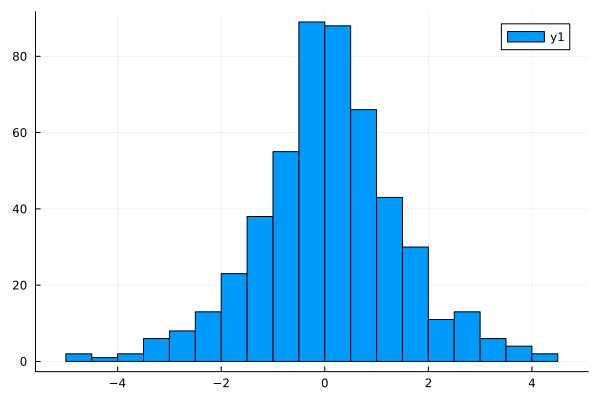

In [17]:
using Distributions
function plothistogram(distribution, n)
    ϵ = rand(distribution, n)  #   n draws from distribution
    histogram(ϵ)
end
lp = Laplace()
plothistogram(lp, 500)

In [18]:
##  Poor style
    ##
    p = 1.0 #   note 1.0 rather than 1
    beta = 0.9
    maxiter = 1000
    tolerance = 1.0E-7
    v_iv = 0.8  #   initial condition

##  Set up the algorithm
    ##
    v_old = v_iv
    norm_diff = Inf
    iter = 1
    while norm_diff > tolerance && iter <= maxiter
        v_new = p + beta * v_old    #   the f(v) map
        norm_diff = norm(v_new - v_old)

    ##  Replace and continue
        ##
        v_old = v_new
        iter = iter + 1
end
println("Fixed point = $v_old
            |f(x) - x| = $norm_diff in $iter iterations")

Fixed point = 9.999999173706609
            |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [19]:
##  Set up the algorithm
    ##
    v_old = v_iv
    normdiff = Inf
    iter = 1
    for i in 1:maxiter
        v_new = p + beta * v_old    ##  the f(v) map
        normdiff = norm(v_new - v_old)
    if normdiff < tolerance ##  Check convergence
        iter = 1
        break   ##  Convereged, exit loop
    end
    ##  Replace and continue
    v_old = v_new
end
println("Fixed point = $v_old
            |f(X) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999081896231
            |f(X) - x| = 9.181037796679448e-8 in 1 iterations


In [20]:
##  Using a function
    ##  Better, but still poor style
        ##
        function v_fp(beta, p, v_iv, tolerance, maxiter)
    
        ##  Set up algorithm
            ##
            v_old = v_iv
            normdiff = Inf
            iter = 1

            while normdiff > tolerance && iter <= maxiter
                v_new = p + beta * v_old    ##  the f(v) map
                normdiff = norm(v_new - v_old)

                ##  Replace and continue
                    ##
                    v_old = v_new
                    iter = iter + 1
            end
            return (v_old, normdiff, iter)  ##  Returns a tuple
        end

    ##  Some values
        ##
        p = 1.0     ##  Note 1.0 rather than 1
        beta = 0.9
        maxiter = 1000
        tolerance = 1.0E-7
        v_initial = 0.8 ##  Initial condition

        v_star, normdiff, iter = v_fp(beta,p, v_initial, tolerance, maxiter)

        println("Fixed point = $v_star
        |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609
        |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [21]:
##  Passing a function
    ##
    ##  Better style
        ##
        function fixedpointmap(f, iv, tolerance, maxiter)
        
        ##  Set up the algorithm
            ##
            x_old = iv
            normdiff = Inf
            iter = 1
            while normdiff > tolerance && iter <= maxiter
                x_new = f(x_old)    ##  Used the passed in map
                normdiff = norm(x_new - x_old)
                x_old = x_new
                iter = iter + 1
            end
            return (x_old, normdiff, iter)
        end

        ##  Define a map and parameters
            ##
            p = 1.0
            beta = 0.9
            f(v) = p + beta * v     ##  Note that p and beta are used in the function!

            maxiter = 1000
            tolerance = 1.0E-7
            v_initial = 0.8     ##  initial condition

        v_star, normdiff, iter = fixedpointmap(f, v_initial, tolerance, maxiter)
        println("Fixed point = $v_star |f(x) - x| = $normdiff in $iter iterations")
                

Fixed point = 9.999999173706609 |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [22]:
##  Named arguements and return values
    ##
    ##  Good style
        ##
        function fixedpointmap(f, iv; tolerance = 1E-7, maxiter = 1000)

        ##  Set up algorithim
            ##
            x_old = iv
            normdiff = Inf
            iter = 1
            while normdiff > tolerance && iter <= maxiter
                x_new = f(x_old)    ##  use the passed in map
                normdiff = norm(x_new - x_old)
                x_old = x_new
                iter = iter + 1
            end
            return (; value = x_old, normdiff, iter)    ##  a named iter
        end

        ##  define a map and parameters
            ##
            p = 1.0
            beta = 0.9
            f(v) = p + beta * v ##  note that the p and beta are used in the function!

            sol = fixedpointmap(f, 0.8; tolerance = 1.0E-8)    ##  don't need to pass
            println("Fixed point = $(sol.value) |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 9.999999918629035 |f(x) - x| = 9.041219328764782e-9 in 177 iterations


In [23]:
(; value, normdiff, iter) = fixedpointmap(f, 0.8; tolerance = 1.0E-8)
println("Fixed point = $value
  |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999918629035
  |f(x) - x| = 9.041219328764782e-9 in 177 iterations


In [24]:
r =2.0
f(x) = r * x * (1-x)

sol = fixedpointmap(f, 0.8) #   the ; is optional but generally good style
println("Fixed point = $(sol.value) |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 0.4999999999999968 |f(x) - x| = 3.979330237546819e-8 in 7 iterations


In [25]:
##  USING A PACKAGE
    ##
    ##  best style
        ##
        using NLsolve

    p = 1.0
    beta = 0.9
    f(v) = p .+ beta * v    #   broadcast the +
    sol = fixedpoint(f, [0.8]; m = 0)
    normdiff = norm(f(sol.zero) - sol.zero)
    println("Fixed point = $(sol.zero) |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixed point = [9.999999909587816] |f(x) - x| = 9.041219328764782e-9 in 176 iterations


In [26]:
# best style
p = 1.0
beta = 0.9
iv = [0.8]
sol = fixedpoint(v -> p .+ beta * v, iv)
fnorm = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero)
  |f(x) - x| = $fnorm  in $(sol.iterations) iterations
  converged = $(sol.f_converged)")

Fixed point = [9.999999999999972]
  |f(x) - x| = 3.552713678800501e-15  in 3 iterations
  converged = true


In [27]:
eps()

2.220446049250313e-16

In [28]:
##  Composing packages
    ##
    ##  use arbitrary precision floating points
        ##
        p = 1.0
        beta = 0.9
        iv = [BigFloat(0.8)]    ##  higher precision

    ##  otherwise identical
    sol = fixedpoint(v -> p .+ beta * v, iv)
    normdiff = norm(f(sol.zero)- sol.zero)
    println("Fixed point = $(sol.zero) |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixed point = BigFloat[10.00000000000000222044604925031357388532909931412848377287867809936811555686155] |f(x) - x| = 0.0 in 3 iterations


In [29]:
##  Exercises
    ##
    ##  Exercise 1
        ##
        factorial(3)
        ##  Create your own version of factorial
            ##
            function factorial2(n)
                k = 1
            for i in 1:n
                k = k * i
            end
            return k
        end

        factorial2(3)


6

In [30]:
factorial(4) == factorial2(4)

true

In [31]:
##  Exercise 2
    ##
    function binomial_rv(n, p)
    
    count = 0
    U = rand(n)

    for i in 1:n
        if U[i] < p
            count = count + 1
        end
    end
    return count
end

for j in 1:25
    b = binomial_rv(10, 0.5)
    print("$b, ")
end

3, 7, 6, 8, 6, 4, 4, 8, 7, 6, 4, 6, 3, 6, 4, 6, 4, 5, 4, 5, 5, 4, 3, 4, 7, 

In [33]:
rand(5)

5-element Vector{Float64}:
 0.840760116360351
 0.9962936110428322
 0.850402242367752
 0.8764042527333067
 0.5509843428741973

In [40]:
##  Exercise 3
    ##
    ##  Using Monte Carlo to approximate π
        ##
        n = 1000000
        count = 0
        for i in 1:n
            u, v = rand(2)
            d = sqrt((u - 0.5)^2 + (v - 0.5)^2 )    #   distance from the middle of the square
            if d < 0.5
                count += 1
            end
        end
    
    area_estimate = count/n

    print(area_estimate * 4)

3.144412

In [2]:
##  Exercise 4
    ##
    ##  Program that prints one realisation of the following random device
        ##  Flip an unbiased coin 10 times
        ##  If 3 consecutive heads occur one or more times within this sequence, pay one dollar.
        ##  If not, pay nothing.
        payoff = 0
        count = 0

        print("Count = ")

        for i in 1:10
            U = rand()
            if U < 0.5
                count += 1
            else 
                count = 0
            end
            print(count)
            if count == 3
                payoff =1
            end
        end
        println("\npayoff = $payoff")

Count = 123

4010120
payoff = 1


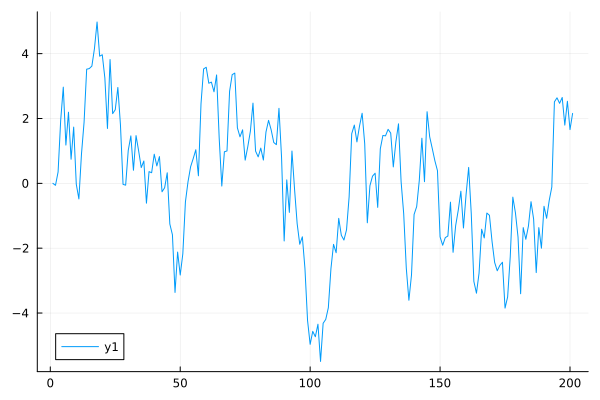

In [4]:
##  Exercise 5
    ##
    ##  Simulate and plot the correlated time-series
        ##
        using Plots

        n = 200
        α = 0.9
        x = zeros(n + 1)

        for  t in 1:n
            x[t+1] = α * x[t] + randn()
        end
        plot(x)
            

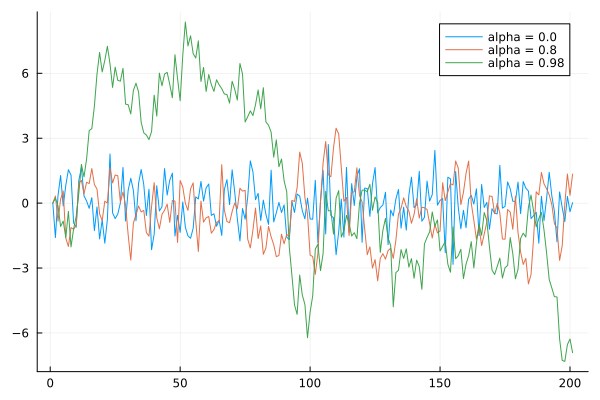

In [9]:
##  Exercise 6
    ##
    using Plots

    n = 200
    alphas = [0, 0.8, 0.98]
    p = plot()  #   naming a plot to add to

    for alpha in alphas
        x = zeros(n + 1)
        x[1] = 0.0
        for t in 1:n
            x[t + 1] = alpha * x[t] + randn()
        end
        plot!(p, x, label = "alpha = $alpha")
    end
    p   #   display plot